# NIFTY 50 stocks data collection and Exploratory Data Analysis

## 1. Introduction

Historical stock market data from Yahoo! Finance will be collected, analysed, transformed and visualised to gain insights into the stock returns for a selection of NIFTY 50 companies from 2012-2021.

## 2. Install/import libraries

In [ ]:
!pip install yfinance 
!pip install mplfinance

In [ ]:
import yfinance as yf

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.patches as mpatches
from matplotlib.dates import date2num, DateFormatter, WeekdayLocator,\
    DayLocator, MONDAY
from mplfinance.original_flavor import candlestick_ohlc
import seaborn as sns

import datetime
from datetime import date, timedelta

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline

## 3. Data collection

Download NIFTY 50 stock data from Yahoo! Finance using yfinance library and store in a pandas dataframe. The stocks chosen are RELIANCE.NS(Reliance Industries), TCS.NS(Tata Consultancy Services), ONGC.NS(Oil and Natural Gas), INFY.NS (Infosys), ITC.NS(ITC) representing a selection of different industries.

In [ ]:
nse50_stocks = yf.download("RELIANCE.NS TCS.NS ONGC.NS INFY.NS ITC.NS", start=datetime.datetime(2012, 1, 1), 
                                     end=datetime.datetime(2021, 12, 31), group_by='tickers')
nse50_stocks.head(10)

## 4. Exploratory Data Analysis

In [ ]:
# Descriptive statistics showing distribution of the data

nse50_stocks.describe()

ITC.NS                                                      \
              Open         High          Low        Close    Adj Close   
count  2464.000000  2464.000000  2464.000000  2464.000000  2464.000000   
mean    229.999858   232.335856   227.310877   229.765347   195.786872   
std      39.169181    39.352908    38.919385    39.046687    36.206752   
min     132.666672   133.333328   131.333328   132.433334   102.725311   
25%     206.666672   208.487499   204.362503   206.266663   174.348907   
50%     228.083336   230.525002   225.516670   227.841667   194.582047   
75%     260.000000   262.487503   257.375008   259.750000   223.441509   
max     346.000000   354.799988   340.299988   342.500000   291.353821   

                          TCS.NS                                         ...  \
             Volume         Open         High          Low        Close  ...   
count  2.464000e+03  2464.000000  2464.000000  2464.000000  2464.000000  ...   
mean   1.457745e+07  1588.707243  1605.515247  1571.141654  1588.129313  ...   
std    1.285779e+07   787.152476   794.671698   779.119142   786.571221  ...   
min    0.000000e+00   532.625000   537.150024   522.650024   532.125000  ...   
25%    7.706729e+06  1118.250000  1130.918732  1102.918762  1118.087524  ...   
50%    1.058679e+07  1281.912476  1295.000000  1270.512512  1280.987488  ...   
75%    1.647559e+07  2060.000000  2081.237427  2036.250000  2053.450012  ...   
max    1.494797e+08  3930.000000  3989.899902  3900.000000  3954.550049  ...   

           INFY.NS                                          RELIANCE.NS  \
               Low        Close    Adj Close        Volume         Open   
count  2464.000000  2464.000000  2464.000000  2.464000e+03  2464.000000   
mean    640.074252   646.946860   589.382419  8.941005e+06   927.099427   
std     345.539891   348.903792   365.744094  8.416750e+06   625.053790   
min     257.568756   265.475006   211.840607  0.000000e+00   334.330872   
25%     442.789062   446.615623   370.656693  5.441703e+06   440.394257   
50%     534.162506   541.637512   462.543106  7.128783e+06   538.644196   
75%     712.149979   719.837494   672.829666  9.920350e+06  1269.516266   
max    1878.400024  1892.849976  1892.849976  1.663204e+08  2742.750000   

                                                                         
              High          Low        Close    Adj Close        Volume  
count  2464.000000  2464.000000  2464.000000  2464.000000  2.464000e+03  
mean    937.645912   915.722374   926.149327   909.927120  8.666866e+06  
std     631.967063   616.629926   623.754545   630.016952  6.170090e+06  
min     338.194244   333.365021   334.875702   309.114929  0.000000e+00  
25%     445.960243   436.419441   440.728584   419.241417  5.199650e+06  
50%     543.052429   531.883270   537.108734   520.039307  6.921992e+06  
75%    1280.784454  1256.266846  1266.618744  1252.863525  9.801447e+06  
max    2751.350098  2708.000000  2731.850098  2731.850098  6.584835e+07  

[8 rows x 30 columns]

In [ ]:
# Concise summary of the dataframe to check for missing values and data types

nse50_stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2464 entries, 2012-01-02 to 2021-12-30
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   (ITC.NS, Open)            2464 non-null   float64
 1   (ITC.NS, High)            2464 non-null   float64
 2   (ITC.NS, Low)             2464 non-null   float64
 3   (ITC.NS, Close)           2464 non-null   float64
 4   (ITC.NS, Adj Close)       2464 non-null   float64
 5   (ITC.NS, Volume)          2464 non-null   int64  
 6   (TCS.NS, Open)            2464 non-null   float64
 7   (TCS.NS, High)            2464 non-null   float64
 8   (TCS.NS, Low)             2464 non-null   float64
 9   (TCS.NS, Close)           2464 non-null   float64
 10  (TCS.NS, Adj Close)       2464 non-null   float64
 11  (TCS.NS, Volume)          2464 non-null   int64  
 12  (ONGC.NS, Open)           2464 non-null   float64
 13  (ONGC.NS, High)           2464 non-null   flo

In [ ]:
# Number of rows indicates number of trading days

nse50_stocks.shape

(2464, 30)

We will use the Adjusted Close price to take into account all corporate actions, such as stock splits and dividends, to give a more accurate reflection of the true value of the stock and present a coherent picture of returns.

In [ ]:
# Dataframe to contain Adjusted Close price for each company's stock

adj_close = pd.DataFrame()

In [ ]:
tickers = ['RELIANCE.NS', 'TCS.NS', 'ONGC.NS', 'INFY.NS', 'ITC.NS']
for ticker in tickers:
    adj_close[ticker] = nse50_stocks[ticker]['Adj Close']

adj_close.head(10)

,RELIANCE.NS,TCS.NS,ONGC.NS,INFY.NS,ITC.NS
Date,,,,,
2012-01-02,323.036713,485.253021,111.483261,278.988434,102.725311
2012-01-03,331.312073,493.075684,113.576118,284.485840,103.604385
2012-01-04,327.425934,482.947357,115.086464,283.502594,103.190704
2012-01-05,319.813385,482.535614,112.950447,282.087250,103.319977
2012-01-06,328.066010,481.465118,113.016754,281.292664,104.509354
2012-01-09,322.899597,482.268127,113.701942,281.729736,104.457642
2012-01-10,336.592834,479.818451,115.470253,284.416351,106.086563
2012-01-11,342.102173,468.125549,114.762939,280.741486,105.129890
2012-01-12,336.912903,448.568787,113.967216,257.068268,105.983131


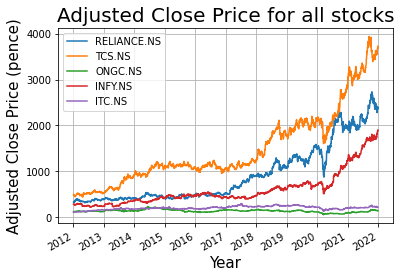

In [ ]:
# Plot Adjusted Close price for all stocks

adj_close.plot(grid = True)
sns.set(rc={'figure.figsize':(15, 9)})
plt.title('Adjusted Close Price for all stocks', color = 'black', fontsize = 20)
plt.xlabel('Year', color = 'black', fontsize = 15)
plt.ylabel('Adjusted Close Price (pence)', color = 'black', fontsize = 15);

This chart shows the absolute price rather than relative change which we are more concerned with when trading. RELIANCE.NS, TCS.NS stocks are far more expensive than ITC.NS and ONGC.NS making the latter appear much less volatile than they truly are. 

In [ ]:
# lambda function to calculate min and max Adjusted Close price 

adj_close_min_max = adj_close.apply(lambda x: pd.Series([x.min(), x.max()], 
                              index=['min', 'max']))

adj_close_min_max

,RELIANCE.NS,TCS.NS,ONGC.NS,INFY.NS,ITC.NS
min,309.114899,439.383575,51.593941,211.840607,102.725288
max,2731.850098,3940.053467,222.299988,1892.849976,291.353851


One solution would be to use two different scales when plotting the data. One scale will be used by the ITC.NS and ONGC.NS stocks, and the other by the more expensive stocks.

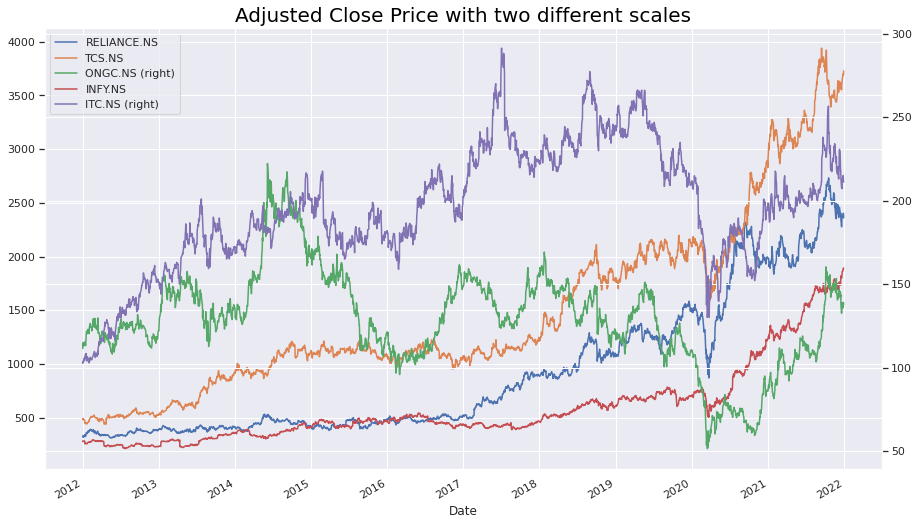

In [ ]:
# Plot ITC.NS and ONGC.NS data on a secondary y-axis

adj_close.plot(secondary_y = ["ITC.NS", "ONGC.NS"], grid = True)
sns.set(rc={'figure.figsize':(15, 9)})
plt.title('Adjusted Close Price with two different scales', color = 'black', fontsize = 20);

## 5. Data transformation

A better solution would be to plot the stocks' returns, which requires transforming the data into something more useful for our purposes.




### 5.1 Consider stocks' returns since beginning of the time period

One transformation is to plot $return_{t,0}$  = $\frac{price_t}{price_0}$ by applying a lambda function to each column in the adj_close dataframe and return a dataframe with the result.

In [ ]:
# Transform data using lambda function to plot stocks' returns

returns_lambda = adj_close.apply(lambda x: x /x[0])
# returns_lambda = adj_close.apply(lambda x: ((x-x[0]) /x[0])*100)
returns_lambda.head()

,RELIANCE.NS,TCS.NS,ONGC.NS,INFY.NS,ITC.NS
Date,,,,,
2012-01-02,1.000000,1.000000,1.000000,1.000000,1.000000
2012-01-03,1.025617,1.016121,1.018773,1.019705,1.008558
2012-01-04,1.013587,0.995249,1.032321,1.016180,1.004530
2012-01-05,0.990022,0.994400,1.013161,1.011107,1.005789
2012-01-06,1.015569,0.992194,1.013755,1.008259,1.017367


Plot $return_{t,0}$  = $\frac{price_t}{price_0}$ with transformed data

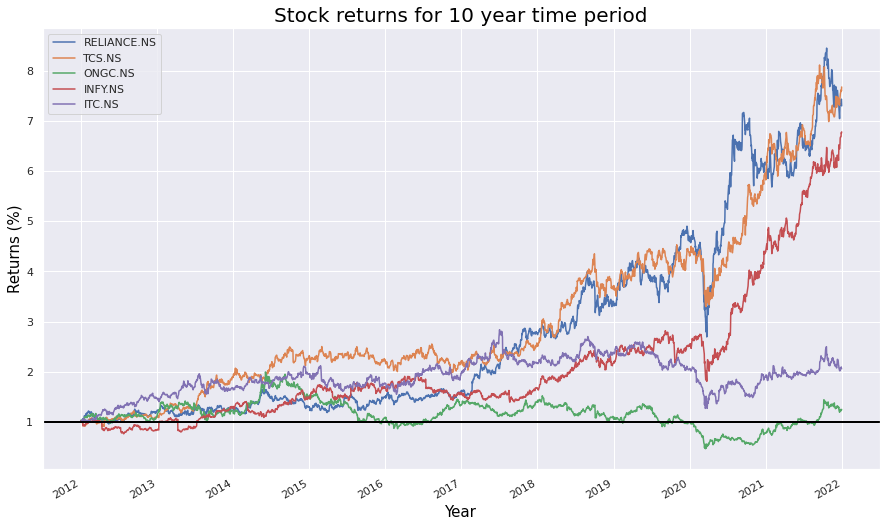

In [ ]:
# Plot to show how profitable each stock was throughout the time period

returns_lambda.plot(grid = True).axhline(y = 1, color = "black", lw = 2)
sns.set(rc={'figure.figsize':(15, 9)})
plt.title('Stock returns for 10 year time period', color = 'black', fontsize = 20)
plt.xlabel('Year', color = 'black', fontsize = 15)
plt.ylabel('Returns (%)', color = 'black', fontsize = 15);

This plot is more useful than the previous one as we can see how profitable each stock was since the beginning of the period and which are most closely correlated. The overall trend of the stocks is much more apparent.

In [ ]:
# Create dataframe to contain returns for each company's stock to plot the change of each stock per day

returns = pd.DataFrame()

### 5.2 Percentage change

Another transformation is to calculate the daily percentage change directly using the pandas **'pct_change()'** method which computes the percentage change from the previous row by default.

This can be represented with the formula $increase_{t}$  = $\frac{price_t - price_{t-1}}{price_t}$ 





In [ ]:
# pandas pct_change() method on the Adj Close column to create a column representing return value

tickers = ['RELIANCE.NS', 'TCS.NS', 'ONGC.NS', 'INFY.NS', 'ITC.NS']
for ticker in tickers:
    returns[ticker] = nse50_stocks[ticker]['Adj Close'].pct_change() * 100

returns

,RELIANCE.NS,TCS.NS,ONGC.NS,INFY.NS,ITC.NS
Date,,,,,
2012-01-02,NaN,NaN,NaN,NaN,NaN
2012-01-03,2.561740,1.612079,1.877284,1.970478,0.855752
2012-01-04,-1.172954,-2.054112,1.329809,-0.345622,-0.399289
2012-01-05,-2.324968,-0.085256,-1.856010,-0.499235,0.125275
2012-01-06,2.580450,-0.221848,0.058705,-0.281681,1.151159
...,...,...,...,...,...
2021-12-24,0.319207,0.223877,-1.423489,0.317615,0.322135
2021-12-27,-0.107470,0.686486,-0.830315,0.142207,-0.206421
2021-12-28,1.187634,0.282730,1.565335,1.170858,1.149164


In [ ]:
# Clean up the data by dropping the first value which becomes a 'NaN' as there is no price change from the day before.

returns.dropna(inplace=True)
returns.head()

,RELIANCE.NS,TCS.NS,ONGC.NS,INFY.NS,ITC.NS
Date,,,,,
2012-01-03,2.561740,1.612079,1.877284,1.970478,0.855752
2012-01-04,-1.172954,-2.054112,1.329809,-0.345622,-0.399289
2012-01-05,-2.324968,-0.085256,-1.856010,-0.499235,0.125275
2012-01-06,2.580450,-0.221848,0.058705,-0.281681,1.151159
2012-01-09,-1.574809,0.166784,0.606271,0.155380,-0.049481


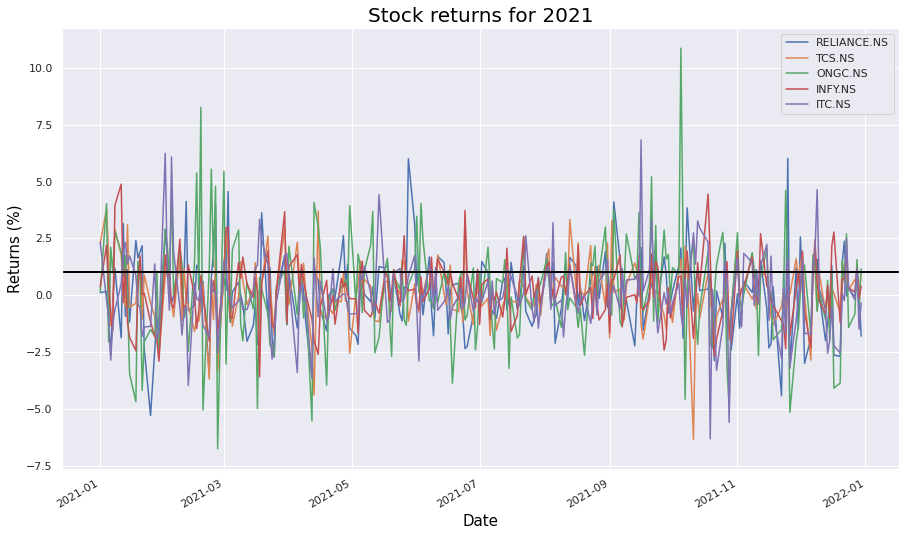

In [ ]:
# Plot returns for 2021

returns.loc['2021-01-01':'2021-12-31'].plot(grid = True).axhline(y = 1, color = "black", lw = 2)
sns.set(rc={'figure.figsize':(15, 9)})
plt.title('Stock returns for 2021', color = 'black', fontsize = 20)
plt.xlabel('Date', color = 'black', fontsize = 15)
plt.ylabel('Returns (%)', color = 'black', fontsize = 15);

The above plot for 2021 shows changes between days, which is what more advanced methods consider when modelling stock behaviour.

### 5.3 Log differences

Another way to model the growth of a stock is with log differences. Taking the natural log of the prices will give an approximation to the true daily returns.

For 𝑥2 and 𝑥1 close to each other, the percent change (𝑥2−𝑥1)/𝑥1 approximates the log difference log𝑥2 − log𝑥1.

This can be represented with the formula $change_{t}$  = $log (price_{t}) - log (price_{t-1})$ 

Using logs, or summarising changes in terms of continuous compounding, has a number of advantages over looking at simple percent changes. For example, if your portfolio goes up by 50% (say from £100 to £150) and then declines by 50% (say from £150 to £75), you’re not back where you started. If you calculate your average percentage return (in this case, 0%), that’s not a particularly useful summary of the fact that you actually ended up 25% below where you started. 

By contrast, if your portfolio goes up in logarithmic terms by 0.5, and then falls in logarithmic terms by 0.5, you are exactly back where you started. The average log return on your portfolio is exactly the same number as the change in log price between the time you bought it and the time you sold it, divided by the number of years that you held it.


In [ ]:
# Use numpy's log function to obtain and plot the log differences of the adjusted price data

stock_change = adj_close.apply(lambda x: np.log(x) - np.log(x.shift(1))) # shift moves dates back by 1.

stock_change.head()

,RELIANCE.NS,TCS.NS,ONGC.NS,INFY.NS,ITC.NS
Date,,,,,
2012-01-02,NaN,NaN,NaN,NaN,NaN
2012-01-03,0.025295,0.015992,0.018599,0.019513,0.008521
2012-01-04,-0.011799,-0.020755,0.013210,-0.003462,-0.004001
2012-01-05,-0.023524,-0.000853,-0.018735,-0.005005,0.001252
2012-01-06,0.025477,-0.002221,0.000587,-0.002821,0.011446


In [ ]:
# Clean up the data by dropping NaNs

stock_change.dropna(inplace=True)
stock_change.head()

,RELIANCE.NS,TCS.NS,ONGC.NS,INFY.NS,ITC.NS
Date,,,,,
2012-01-03,0.025295,0.015992,0.018599,0.019513,0.008521
2012-01-04,-0.011799,-0.020755,0.013210,-0.003462,-0.004001
2012-01-05,-0.023524,-0.000853,-0.018735,-0.005005,0.001252
2012-01-06,0.025477,-0.002221,0.000587,-0.002821,0.011446
2012-01-09,-0.015873,0.001666,0.006044,0.001553,-0.000495


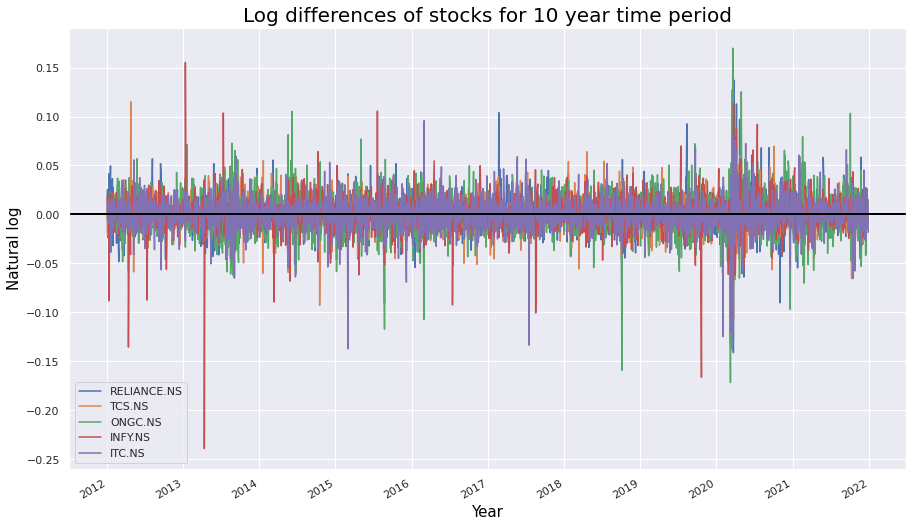

In [ ]:
# Plot log differences for 2012-2021

stock_change.plot(grid = True).axhline(y = 0, color = "black", lw = 2)
sns.set(rc={'figure.figsize':(15, 9)})
plt.title('Log differences of stocks for 10 year time period', color = 'black', fontsize = 20)
plt.xlabel('Year', color = 'black', fontsize = 15)
plt.ylabel('Natural log', color = 'black', fontsize = 15);

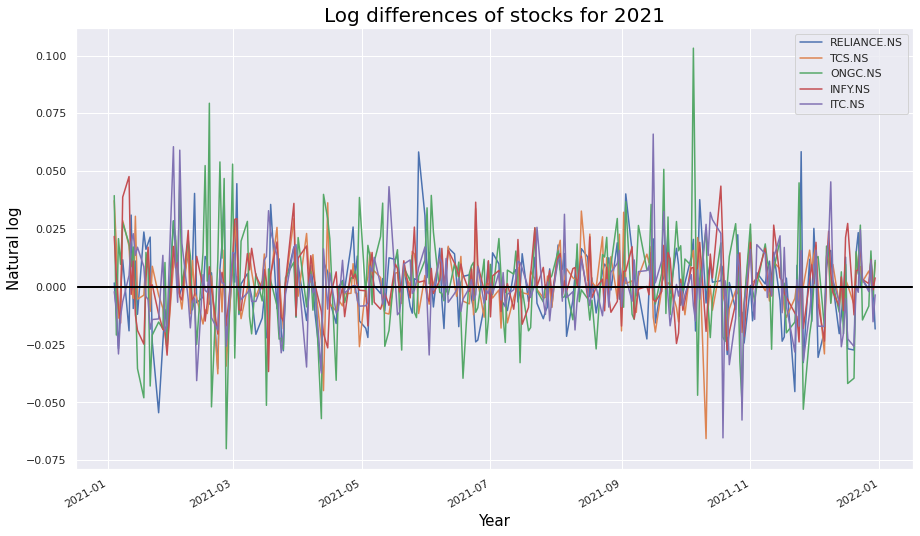

In [ ]:
# Plot log differences for 2021

stock_change.loc['2021-01-01':'2021-12-31'][1:].plot(grid = True).axhline(y = 0, color = "black", lw = 2)
sns.set(rc={'figure.figsize':(15, 9)})
plt.title('Log differences of stocks for 2021', color = 'black', fontsize = 20)
plt.xlabel('Year', color = 'black', fontsize = 15)
plt.ylabel('Natural log', color = 'black', fontsize = 15);

### 5.4 Annualise returns

We can annualise our returns, thus computing the annual percentage rate (APR). This helps us keep returns on a common time scale.

In [ ]:
# annualise returns

stock_change_apr = stock_change * 252 * 100    # There are 252 trading days in a year; the 100 converts to percentages

stock_change_apr

,RELIANCE.NS,TCS.NS,ONGC.NS,INFY.NS,ITC.NS
Date,,,,,
2012-01-03,637.428229,403.004208,468.689871,491.731508,214.732068
2012-01-04,-297.331673,-523.026562,332.903256,-87.247622,-100.822277
2012-01-05,-592.810330,-21.493757,-472.109525,-126.122312,31.549617
2012-01-06,642.025008,-55.967801,14.789210,-71.083773,288.434970
2012-01-09,-400.009843,41.994675,152.319132,39.125390,-12.472241
...,...,...,...,...,...
2021-12-24,80.312107,56.353862,-361.296931,79.912252,81.047470
2021-12-27,-27.097010,172.403358,-210.112969,35.810666,-52.071884
2021-12-28,297.520595,71.147343,391.408926,293.342354,287.938055


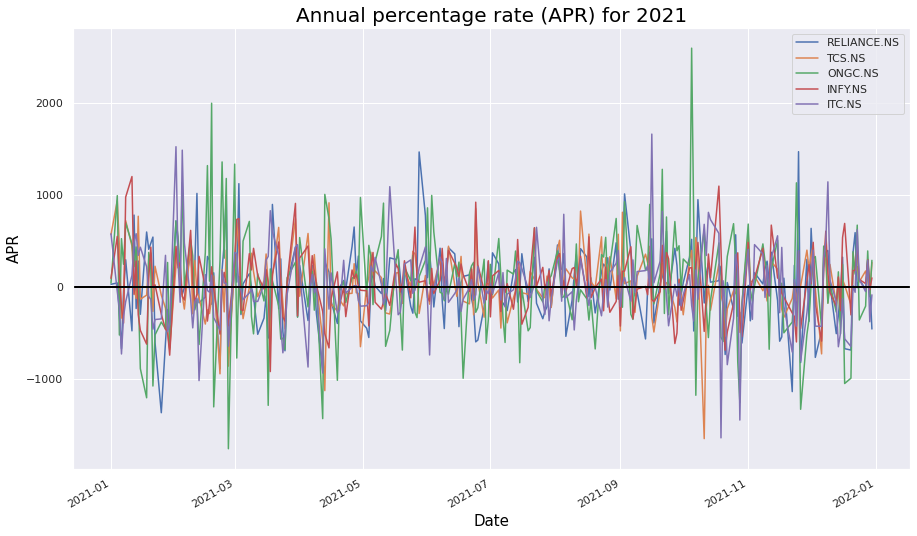

In [ ]:
# Plot annualised returns for 2021

stock_change_apr['2021-01-01':'2021-12-31'].plot(grid = True).axhline(y = 0, color = "black", lw = 2)
sns.set(rc={'figure.figsize':(15, 9)})
plt.title('Annual percentage rate (APR) for 2021', color = 'black', fontsize = 20)
plt.xlabel('Date', color = 'black', fontsize = 15)
plt.ylabel('APR', color = 'black', fontsize = 15);

## 6. Calculating statistical data for returns

### 6.1 Calculate minimum and maximum returns for 2012-2021

In [ ]:
# Date of worst single day returns

returns.idxmin()

RELIANCE.NS   2020-03-23
TCS.NS        2020-03-12
ONGC.NS       2020-03-09
INFY.NS       2013-04-12
ITC.NS        2015-03-02
dtype: datetime64[ns]

In [ ]:
# Date of best single day returns

returns.idxmax()

RELIANCE.NS   2020-03-25
TCS.NS        2012-04-24
ONGC.NS       2020-03-20
INFY.NS       2013-01-11
ITC.NS        2016-03-01
dtype: datetime64[ns]

### 6.2 Mean

The mean is a statistical indicator that can be used to gauge the performance of a company’s stock price over a particular time period. Here it is the average of the returns, and also determines the standard deviation and variance.


In [ ]:
# Compute mean to give a representation of the average expected returns 

returns.mean()

RELIANCE.NS    0.096842
TCS.NS         0.095130
ONGC.NS        0.031380
INFY.NS        0.093486
ITC.NS         0.042929
dtype: float64

### 6.3 Variance

The variance measures variability from the average or mean. It correlates to the size of the overall range of the data set, being greater when there is a wider range and narrower when there is a narrower range.  

It is calculated by taking the differences between each value in the data set and the mean, squaring the differences to make them positive, and dividing the sum of the squares by the number of values in the data set.

The calculation of variance uses squares because it weighs outliers more heavily than data closer to the mean. This calculation also prevents differences above the mean from cancelling out those below, which would result in a variance of zero.

This can be represented by the formula σ<sup>2</sup> = $\frac {\sum_{i = 1}^n (x_i - \overline{x})^2}{n}$




In [ ]:
# Compute variance to give a measure of the dispersion of returns around the mean

returns.var()

RELIANCE.NS    3.228884
TCS.NS         2.467460
ONGC.NS        4.483435
INFY.NS        3.110344
ITC.NS         2.718678
dtype: float64

### 6.4 Standard deviation

Standard deviation (σ) is often used by investors to measure the risk of a stock or a stock portfolio, the basic idea being that it is a measure of volatility. It looks at how far from the mean a group of values is, and is calculated as the square root of variance by figuring out the variation between each data point relative to the mean. Essentially, it is the square root of the average squared deviation from the mean, and the more spread out the values are, the higher the standard deviation.
 


In [ ]:
# Compute the standard deviation to describe dispersion, or variability, in the stock returns from the mean 
 
returns.std()

RELIANCE.NS    1.796910
TCS.NS         1.570815
ONGC.NS        2.117412
INFY.NS        1.763617
ITC.NS         1.648841
dtype: float64

However, in order for standard deviation to be an accurate measure of risk, an assumption has to be made that investment performance data follows a normal distribution and has a skewness of 0.

### 6.5 Skewness

Financial returns are typically positively or negatively skewed and warp the look of the normally distributed bell-shaped curve distorting the accuracy of standard deviation as a measure of risk. Skewness essentially measures the relative size of the two tails of the distribution.

In [ ]:
# Compute skewness to measure the asymmetry of the data around its mean

returns.skew()

RELIANCE.NS    0.328204
TCS.NS         0.076721
ONGC.NS        0.130695
INFY.NS       -0.706805
ITC.NS        -0.496312
dtype: float64

### 6.6 Kurtosis

Kurtosis is a measure of the combined sizes of the two tails - not the peakedness or flatness. It measures the tail-heaviness of the distribution, or amount of probability in the tails. 


In [ ]:
# Compute kurtosis as a measure of the combined sizes of the two tails.

returns.kurt()

RELIANCE.NS     7.311361
TCS.NS          4.574019
ONGC.NS         8.046802
INFY.NS        19.911447
ITC.NS          8.318290
dtype: float64

A normal distribution has a kurtosis of 3, however the pandas kurtosis function makes it a uniform zero and in this case the measure is called excess kurtosis.

It appears that INFY.NS has significant excess kurtosis followed by ITC.NS.


## 7. Data visualisation of returns

### 7.1 Pairplot 

Plot pairwise relationships of the stocks with the pairplot() function which uses scatterplot() for each pairing of the variables and histplot() for the marginal plots along the diagonal.

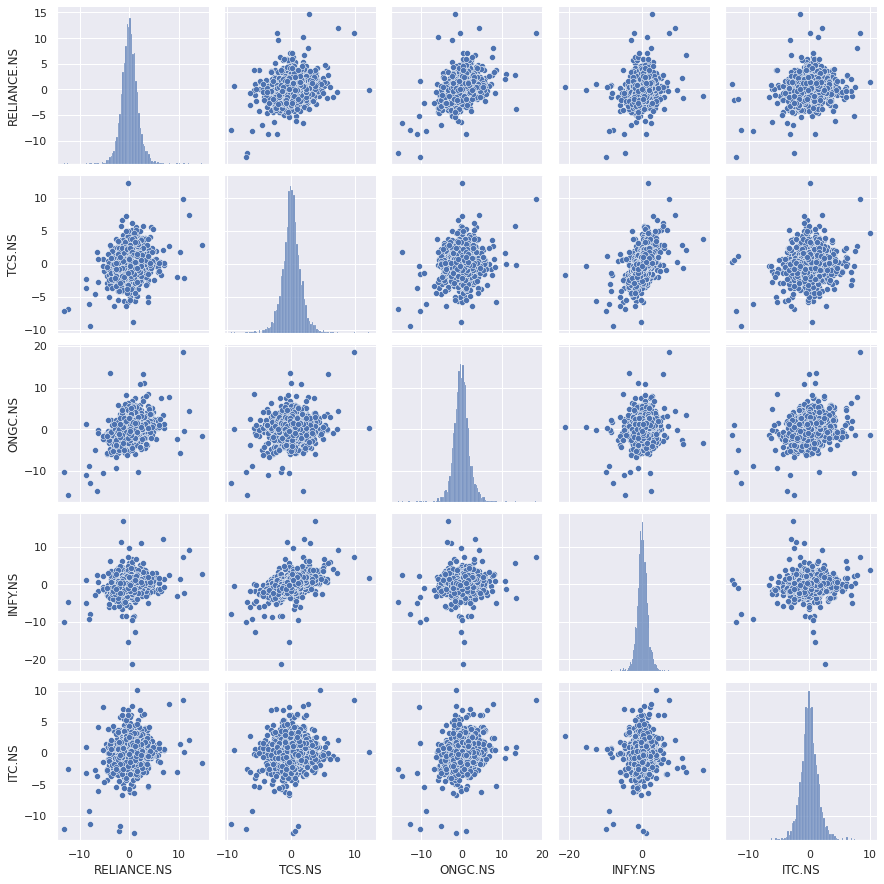

In [ ]:
# Pairplot of returns dataframe 

sns.pairplot(returns);

### 7.2 Box plots

Box and whisker plots are a standardised way of displaying the distribution of data based on a five number summary (minimum, first quartile (Q1), median, third quartile (Q3), and maximum), with a line going through the box at the median. 



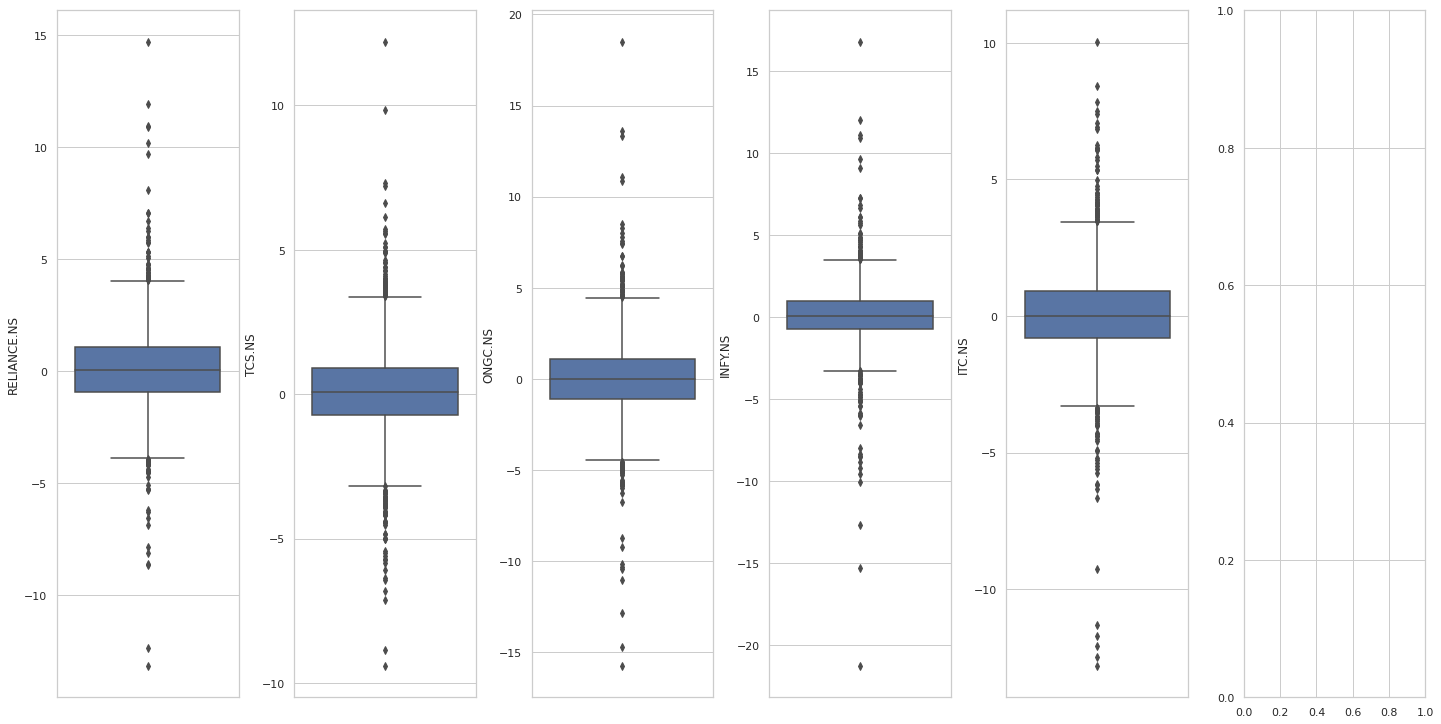

In [ ]:
# Boxplots showing distribution of the returns data over the time period 

sns.set_style("whitegrid")
fig, axs = plt.subplots(ncols=6, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in returns.items():
    sns.boxplot(y=k, data=returns, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

By comparing the interquartile ranges (box lengths), we can compare dispersion. If two boxes do not overlap with one another then there is a difference between the two groups.

If we compare the respective medians and the median line of one box lies outside of another entirely, then there is likely to be a difference between the two groups.

Whiskers show how big a range there is between maximum and minimum values, with larger ranges indicating wider distribution, that is, more scattered data.

We can look for signs of skewness suggesting that data may not be normally distributed. Skewed data show a lopsided box plot, where the median cuts the box into two unequal pieces. If the longer part of the box is above the median, the data is said to be positively skewed. If the longer part is or below the median, the data is negatively skewed.

Any values in the data set that are more extreme than the adjacent values are plotted as separate points on the box plot. This identifies them as potential outliers.


### 7.3 Distribution plots

Distribution plots depict the variation in the data distribution. Here the distribution of returns is shown by a histogram and a line in combination with it which is the kernel density estimate.

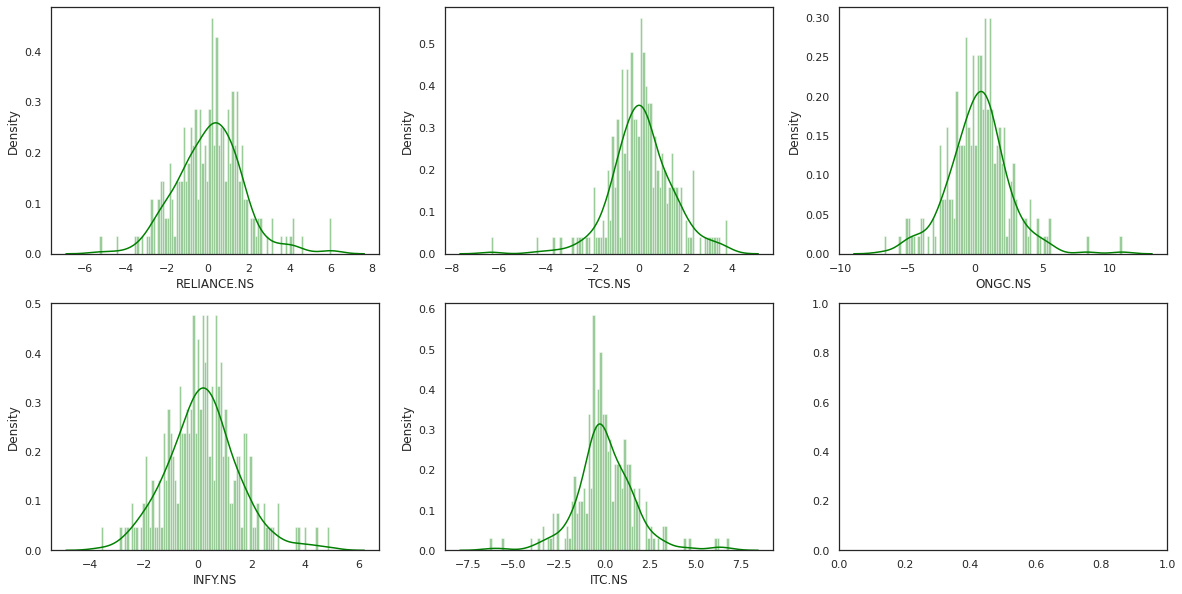

In [ ]:
# Distribution plots showing the data for returns for 2021

sns.set_style("white")

tickers = ['RELIANCE.NS', 'TCS.NS', 'ONGC.NS', 'INFY.NS', 'ITC.NS']
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()

for ticker in tickers:
    sns.distplot(returns.loc['2021-01-01':'2021-12-31'][ticker], color='green', bins=100, ax=axs[index])
    index += 1

### 7.4 Covariance

Covariance indicates the **direction** of the linear relationship between variables. It is a measure of the relationship between two stocks' returns and can help determine if stocks' returns tend to move with or against each other. 

Investors might even be able to select stocks that complement each other in terms of price movement. This can help reduce the overall risk and increase the overall potential return of a portfolio.

In [ ]:
# Covariance matrix to show direction of relationship between stocks' returns

returns.cov() 

,RELIANCE.NS,TCS.NS,ONGC.NS,INFY.NS,ITC.NS
RELIANCE.NS,3.228884,0.616287,1.476329,0.622558,0.640537
TCS.NS,0.616287,2.467460,0.542667,1.374400,0.446623
ONGC.NS,1.476329,0.542667,4.483435,0.509877,0.884301
INFY.NS,0.622558,1.374400,0.509877,3.110344,0.328989
ITC.NS,0.640537,0.446623,0.884301,0.328989,2.718678


### 7.5 Correlation

Correlation measures both the **strength and direction** of the linear relationship between two variables, or the degree to which two variables move in relation to each other, and is a function of the covariance.

In [ ]:
# Correlation matrix to show strength and direction of relationship between stocks' returns

returns.corr()

,RELIANCE.NS,TCS.NS,ONGC.NS,INFY.NS,ITC.NS
RELIANCE.NS,1.000000,0.218339,0.388018,0.196449,0.216192
TCS.NS,0.218339,1.000000,0.163156,0.496117,0.172439
ONGC.NS,0.388018,0.163156,1.000000,0.136539,0.253289
INFY.NS,0.196449,0.496117,0.136539,1.000000,0.113135
ITC.NS,0.216192,0.172439,0.253289,0.113135,1.000000


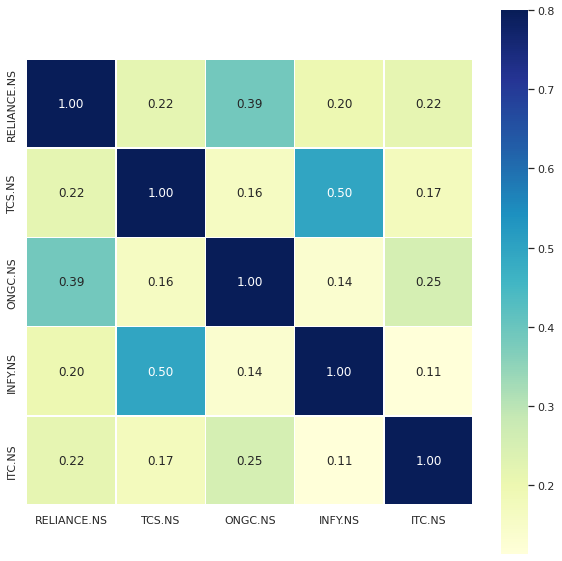

In [ ]:
# The heatmap clearly shows the strength of correlation between pairs of company returns

plt.figure(figsize=(10, 10))
sns.heatmap(data = returns.corr(), vmax=.8, linewidths=0.5,  fmt='.2f',
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.show()

The strongest correlation is between INFOSYS and TCS followed by ONGC and RELIANCE.